#Lesson_4
1. Oбучить рукописную сверточную нейронную сеть (с падением размера ядра свертки и последовательностью блоков свертка-пулинг (conv-pool)-(conv-pool)-...) на датасете cifar-10
2. Oценить рост точности при увеличении ширины сети (больше фильтров)
3. Oценить рост точности при увеличении глубины сети (больше слоев)

*сравнить с точностью полносвязной сети для этой выборки

## Загрузка данных

In [24]:
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from keras import Model, Sequential, Input
from keras.datasets import cifar
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, BatchNormalization, Flatten, Activation
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

In [25]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [26]:
# названия классов
class_names = {0:'airplane',
               1:'automobile',
               2:'bird',
               3:'cat',
               4:'deer',
               5:'dog',
               6:'frog',
               7:'horse',
               8:'ship',
               9:'truck'}    

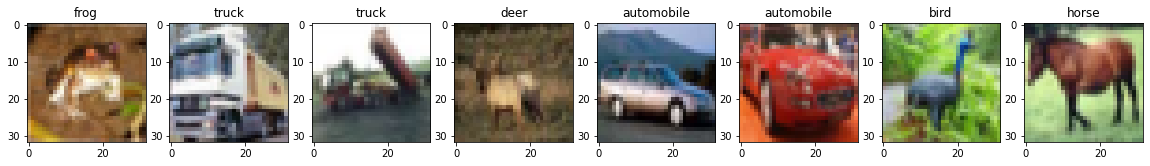

In [27]:
fig, ax = plt.subplots(1, 8)
for i in range(8):
    plt.subplot(1, 8, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]])
    
    
fig.set_figwidth(20)
fig.set_figheight(10)
plt.show()

In [28]:
X_train.shape[1:]

(32, 32, 3)

In [29]:
# нормализация данных
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


X_train /= 255
X_test /= 255

## Построение модели CNN

### Качество от увеличения числа слоев

In [ ]:
tf.random.set_seed(10)

# Максимальное количество слоев
N = 5

n_layers = []
accuracy = []

for j in range(N):
    model_cnn = Sequential()

    model_cnn.add(Conv2D(32, 3, padding='same', input_shape= X_train.shape[1:]))
    model_cnn.add(Dropout(0.2))
    model_cnn.add(Activation('relu'))
    model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # увеличение числа блоков (Conv-Pooling)
    for layer in range(j):
        model_cnn.add(Conv2D(32, 3, padding='same',))
        model_cnn.add(Activation('relu'))
        model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model_cnn.add(Flatten())
    model_cnn.add(Dense(128, activation='relu'))
    model_cnn.add(Dense(10, activation='softmax'))

    model_cnn.compile(optimizer='Adam',
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    metrics='accuracy')
    
    history = model_cnn.fit(X_train, y_train, batch_size=64,
                            epochs=8, validation_data=(X_test, y_test),
                            verbose=0)
    
    # print(f'accuracy = {model_cnn.evaluate(X_test, y_test)[1]}, n_layers = {j+1}')

    n_layers.append(j+1)
    accuracy.append(history.history['val_accuracy'])

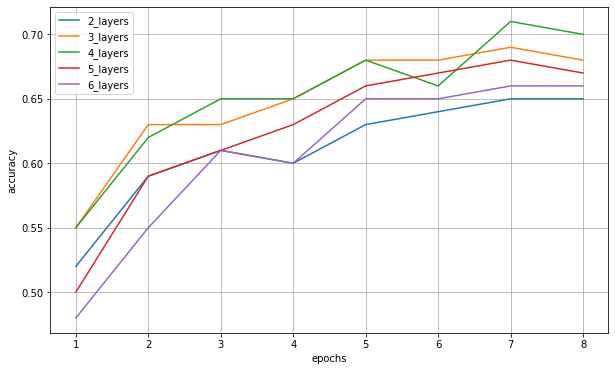

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(N):
    plt.plot(np.round(accuracy[i], 2), label=f'{n_layers[i]+1}_layers')
    

plt.xticks(np.arange(8), labels=np.arange(1, 9))
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()

Самое оптимальное использовать 4 слоя - Convolution-Dropout-Activation-MaxPooling

### Увеличение количества фильтров

In [ ]:
tf.random.set_seed(10)

# Максимальное количество слоев
N = 5

n_params = []
accuracy_test = []
accuracy_train = []

for j in range(1, N+1):
    model_cnn = Sequential()

    model_cnn.add(Conv2D(32, 3, padding='same', input_shape= X_train.shape[1:]))
    model_cnn.add(Dropout(0.2))
    model_cnn.add(Activation('relu'))
    model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    
    model_cnn.add(Conv2D(32 * j, 3, padding='same',))
    model_cnn.add(Dropout(0.2))
    model_cnn.add(Activation('relu'))
    model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model_cnn.add(Conv2D(64 * j, 3, padding='same',))
    model_cnn.add(Dropout(0.2))
    model_cnn.add(Activation('relu'))
    model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model_cnn.add(Conv2D(128 * j, 3, padding='same',))
    model_cnn.add(Dropout(0.2))
    model_cnn.add(Activation('relu'))
    model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model_cnn.add(Flatten())
    model_cnn.add(Dense(128, activation='relu'))
    model_cnn.add(Dense(10, activation='softmax'))

    model_cnn.compile(optimizer='Adam',
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    metrics='accuracy')
    
    history = model_cnn.fit(X_train, y_train, batch_size=64,
                            epochs=8, validation_data=(X_test, y_test),
                            verbose=0)
    

    n_params.append(model_cnn.count_params())
    accuracy_test.append(history.history['val_accuracy'])
    accuracy_train.append(history.history['accuracy'])

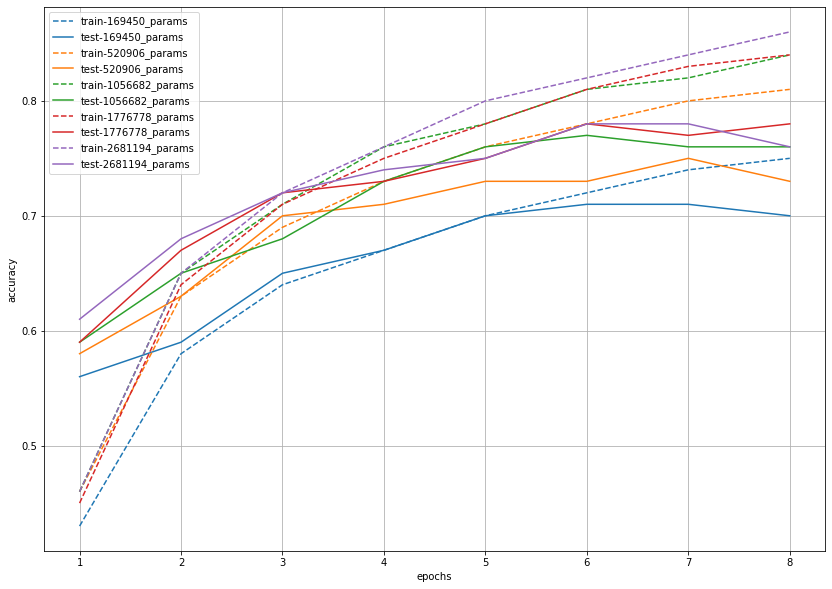

In [ ]:
plt.figure(figsize=(14, 10))
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for i in range(N):
    plt.plot(np.round(accuracy_train[i], 2), '--', label=f'train-{n_params[i]}_params', color=color[i])
    plt.plot(np.round(accuracy_test[i], 2), '-', label=f'test-{n_params[i]}_params', color=color[i])
    
plt.xticks(np.arange(8), labels=np.arange(1, 9))
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()

При увеличении количества фильтров модели в каждом слое точность модели начинает возрастать, но при сильном увеличении параметров модель начинает переобучаться и ухудшается точность на тестовой выборке.
    Возьмем 1776778 параметров.

### Final model

#### Выбор значения порога Dropout

In [ ]:
tf.random.set_seed(10)

n = 15
drop = []
accuracy_test = []
accuracy_train = []

for i in [0, 0.1, 0.2, 0.5]:
    model_cnn = Sequential()

    model_cnn.add(Conv2D(32, 3, padding='same', input_shape= X_train.shape[1:]))
    model_cnn.add(Dropout(i))
    model_cnn.add(Activation('relu'))
    model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


    model_cnn.add(Conv2D(32 * 4, 3, padding='same',))
    model_cnn.add(Dropout(i))
    model_cnn.add(Activation('relu'))
    model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model_cnn.add(Conv2D(64 * 4, 3, padding='same',))
    model_cnn.add(Dropout(i))
    model_cnn.add(Activation('relu'))
    model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model_cnn.add(Conv2D(128 * 4, 3, padding='same',))
    model_cnn.add(Dropout(i))
    model_cnn.add(Activation('relu'))
    model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # полносвязная нейронная сеть
    model_cnn.add(Flatten())
    model_cnn.add(Dense(256, activation='relu'))
    model_cnn.add(Dropout(i))
    model_cnn.add(Dense(256, activation='relu'))
    model_cnn.add(Dropout(i))
    model_cnn.add(Dense(256, activation='relu'))
    model_cnn.add(Dropout(i))
    model_cnn.add(Dense(10, activation='softmax'))

    model_cnn.compile(optimizer='Adam',
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    metrics='accuracy')

    history = model_cnn.fit(X_train, y_train,
                            epochs=n,
                            batch_size=32,
                            validation_data=(X_test, y_test),
                            verbose=1)

    drop.append(i)
    accuracy_test.append(history.history['val_accuracy'])
    accuracy_train.append(history.history['accuracy'])

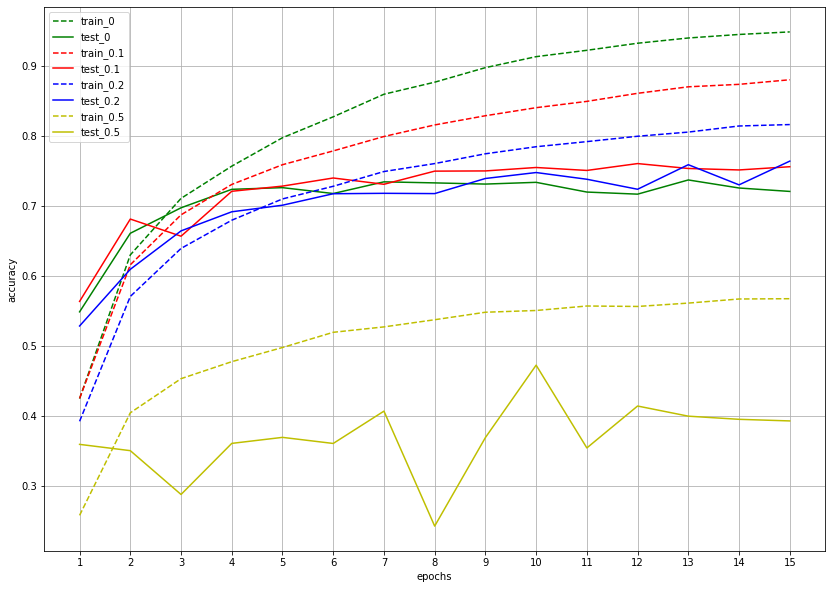

In [ ]:
plt.figure(figsize=(14, 10))
colors = ['g', 'r', 'b', 'y']

for i in range(len(drop)):
    plt.plot(accuracy_train[i], '--', c=colors[i], label=f'train_{drop[i]}')
    plt.plot(accuracy_test[i], '-', c=colors[i], label=f'test_{drop[i]}')
    
plt.xticks(np.arange(n), labels=np.arange(1, n+1))
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()

Самая стабильная и качественная модель получилась при Dropout = 0.2 при 13 эпохах, так как там почти отсутствует переобучение

#### Final accuracy

In [ ]:
tf.random.set_seed(10)

accuracy_test = []
accuracy_train = []

final_model_cnn = Sequential()

final_model_cnn.add(Conv2D(32, 3, padding='same', input_shape= X_train.shape[1:]))
final_model_cnn.add(Dropout(0.2))
final_model_cnn.add(Activation('relu'))
final_model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


final_model_cnn.add(Conv2D(32 * 4, 3, padding='same',))
final_model_cnn.add(Dropout(0.2))
final_model_cnn.add(Activation('relu'))
final_model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

final_model_cnn.add(Conv2D(64 * 4, 3, padding='same',))
final_model_cnn.add(Dropout(0.2))
final_model_cnn.add(Activation('relu'))
final_model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

final_model_cnn.add(Conv2D(128 * 4, 3, padding='same',))
final_model_cnn.add(Dropout(0.2))
final_model_cnn.add(Activation('relu'))
final_model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# полносвязная нейронная сеть
final_model_cnn.add(Flatten())
final_model_cnn.add(Dense(256, activation='relu'))
final_model_cnn.add(Dropout(0.2))
final_model_cnn.add(Dense(256, activation='relu'))
final_model_cnn.add(Dropout(0.2))
final_model_cnn.add(Dense(256, activation='relu'))
final_model_cnn.add(Dropout(0.2))
final_model_cnn.add(Dense(10, activation='softmax'))

final_model_cnn.compile(optimizer='Adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics='accuracy')

history = final_model_cnn.fit(X_train, y_train, 
                        callbacks=tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
                        epochs=13,
                        batch_size=32,
                        validation_data=(X_test, y_test),
                        verbose=1)

accuracy_test.append(history.history['val_accuracy'])
accuracy_train.append(history.history['accuracy'])



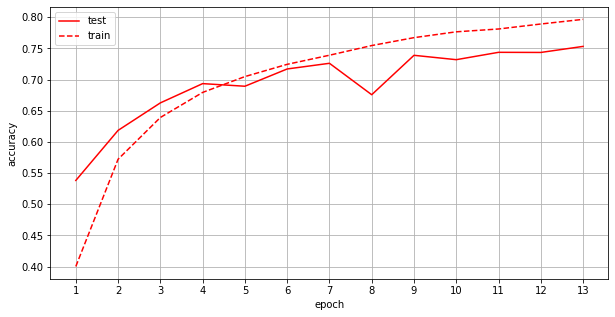

In [ ]:
n = len(accuracy_test[0])

plt.figure(figsize=(10, 5))
plt.plot(accuracy_test[0], 'r-', label='test')
plt.plot(accuracy_train[0], 'r--', label='train')
plt.legend()
plt.grid()
plt.xticks(np.arange(n), labels=np.arange(1, n+1))
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

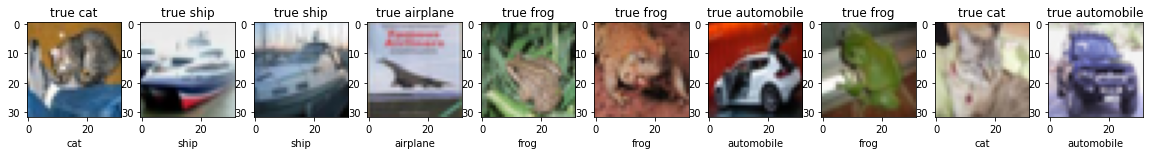

In [ ]:
y_pred = np.argmax(final_model_cnn.predict(X_test, verbose=0), axis=1)

fig, ax = plt.subplots(1, 10)

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[i])
    plt.xlabel(class_names[y_pred[i]])
    plt.title('true ' + class_names[y_test[i][0]])

fig.set_figwidth(20)
plt.show()

In [ ]:
print(f'Точность финальной модели на трейне: {final_model_cnn.evaluate(X_train, y_train, verbose=0)[1]}')
print(f'Точность финальной модели на тесте: {final_model_cnn.evaluate(X_test, y_test, verbose=0)[1]}')

Точность финальной модели на трейне: 0.8656799793243408
Точность финальной модели на тесте: 0.7530999779701233


## Построение полносвязной нейронной сети

In [ ]:
tf.random.set_seed(10)

input = Input(X_train.shape[1:])
x1 = Flatten()(input)
x2 = Dense(1024, activation='relu')(x1)
x3 = Dense(512, activation='relu')(x2)
x4 = Dense(1024, activation='relu')(x3)
x5 = Dense(2048, activation='relu')(x4)
x6 = Dense(4000, activation='relu')(x5)
x7 = Dense(4000, activation='relu')(x6)
output = Dense(10, activation='softmax')(x7)

model_nn = Model(input, output)

model_nn.compile(optimizer='Adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics='accuracy')

m_nn = model_nn.fit(X_train, y_train,
                    callbacks=tf.keras.callbacks.EarlyStopping(patience=20),
                    batch_size=128,
                    epochs=100,
                    validation_data=(X_test, y_test))

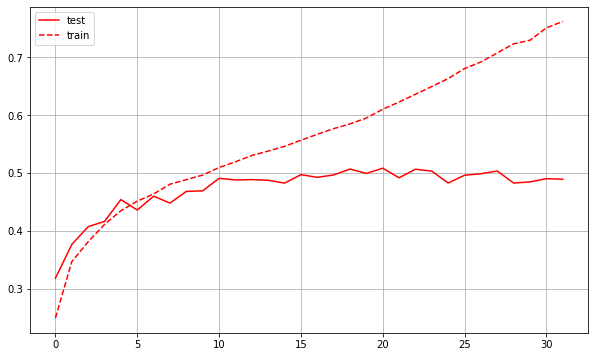

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(m_nn.history['val_accuracy'], 'r-', label='test')
plt.plot(m_nn.history['accuracy'], 'r--', label='train')
plt.legend()
plt.grid()
plt.show()

In [ ]:
print(f'Количество параметров полносвязной модели - {model_nn.count_params()}')
print(f'Количество параметров при сверточной модели - {final_model_cnn.count_params()}')

Количество параметров полносвязной модели - 30536074
Количество параметров при сверточной модели - 2171914


При обучении полносвязной нейронной модели возникает проблема переобучения на обучающей выборке, а также необходимо слишком много параметров в модели.